# Financial time series forecasting with ARIMA

In [67]:
!pwd

/content/gdrive/My Drive/Time_series_forecasting


      USDRL   OPEC         Gold     X50C  ...  Banks   Food   Bimeh   Fnafti
Days                                      ...                               
1     10486  72.64  1224.500000  19910.2  ...  220.3  559.6  2608.9  31196.0
2     10462  72.27  1224.500000  19918.5  ...  221.0  561.8  2688.9  31114.5
3     10443  73.25  1226.599976  20116.2  ...  222.2  564.8  2748.7  31089.7
4     10450  73.05  1229.699951  20292.2  ...  225.6  564.9  2817.4  31502.9
5     10460  73.03  1233.800049  20292.2  ...  225.6  564.9  2817.4  31502.9

[5 rows x 18 columns]


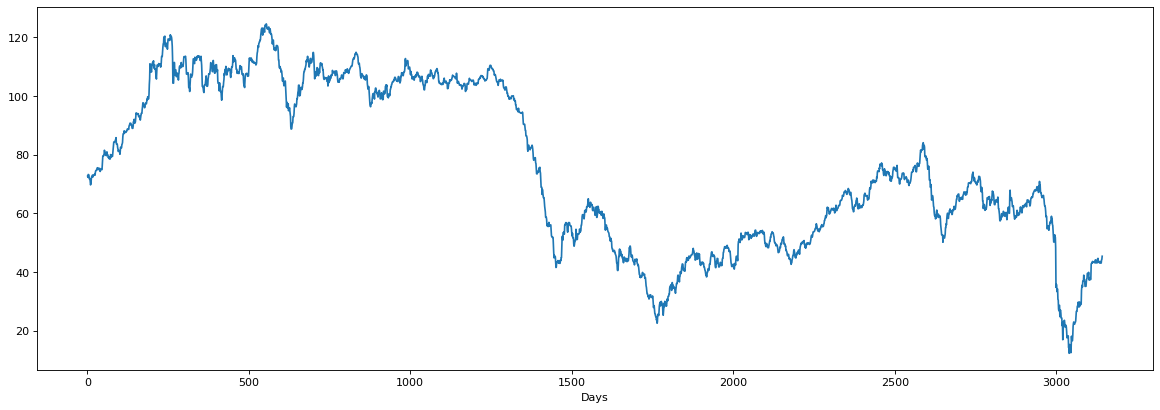

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
  Author : Afshin Karimi
  Affiliation : Sharif University Of Technology
  Title : Financial time series forecasting with ARIMA
  Email : fshnkarimi@ce.sharif.edu
"""
import pandas as pd
from matplotlib import pyplot
import datetime
from matplotlib.pyplot import figure
# start = datetime.datetime.strptime("11-08-2011", "%d-%m-%Y")
# end = datetime.datetime.strptime("18-03-2020", "%d-%m-%Y")
# date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
# Days=[]
# for date in date_generated:
#     Days.append(date.strftime("%d-%m-%Y"))

series = pd.read_csv('Data_all.csv')
Days = range(1,len(series)+1)
series.insert(0, "Days", Days)
series.to_csv("new_Data_all.csv", index=False)
series = pd.read_csv('new_Data_all.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
series["OPEC"].plot()
pyplot.show()

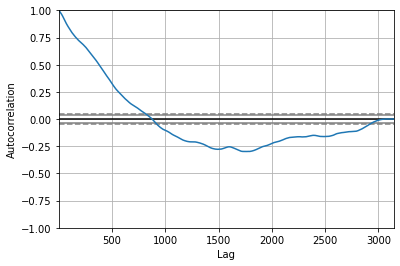

In [ ]:

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series["OPEC"])
pyplot.show()

In [ ]:

# Import the library 
from pmdarima import auto_arima 

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(series['OPEC'], start_p = 1, start_q = 1, 
						max_p = 3, max_q = 3, m = 12, 
						start_P = 0, seasonal = True, 
						d = None, D = 1, trace = True, 
						error_action ='ignore', # we don't want to know if an order does not work 
						suppress_warnings = True, # we don't want convergence warnings 
						stepwise = True)		 # set to stepwise 

# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=23.39 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=17822.000, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9896.429, Time=7.03 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=14580.377, Time=7.71 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=17822.113, Time=0.20 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=10718.563, Time=0.94 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=9592.783, Time=21.48 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=45.93 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=18.65 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=17727.919, Time=8.43 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=9501.622, Time=23.33 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=9794.035, Time=7.59 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=70.66 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=28.54 sec
 ARIMA(3,0,0)(2,1,0)[12] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3142
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -4744.829
Date:                            Wed, 10 Feb 2021   AIC                           9499.657
Time:                                    19:10:53   BIC                           9529.901
Sample:                                         0   HQIC                          9510.513
                                           - 3142                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1481      0.012     95.617      0.000       1.125       1.172
ar.L2         -0.1714      0.012    -14.252      0.000      -0.195      -0.148
ar.S.L12      -0.6427      0.012    -52.436      0.000      -0.667      -0.619
ar.S.L24      -0.3032      0.011    -27.147      0.000      -0.325      -0.281
sigma2         1.2109      0.014     86.266      0.000       1.183       1.238
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10623.40
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.48
Prob(H) (two-sided):                  0.42   Kurtosis:                        11.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                              ARMA Model Results                              
Dep. Variable:                   OPEC   No. Observations:                 3142
Model:                     ARMA(2, 0)   Log Likelihood               -4343.904
Method:                       css-mle   S.D. of innovations              0.963
Date:                Wed, 10 Feb 2021   AIC                           8695.809
Time:                        20:11:21   BIC                           8720.019
Sample:                             0   HQIC                          8704.497
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.2025     16.536      4.185      0.000      36.793     101.613
ar.L1.OPEC     1.1603      0.017     66.991      0.000       1.126       1.194
ar.L2.OPEC    -0.1611      0.017     -9.302      0.0

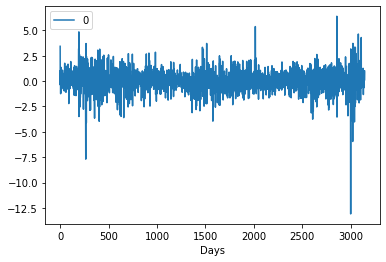

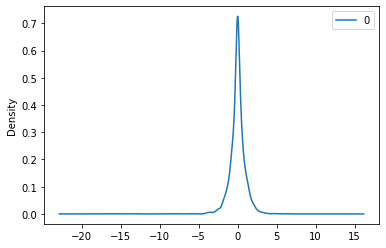

                 0
count  3142.000000
mean     -0.000757
std       0.965332
min     -13.099226
25%      -0.402619
50%       0.008413
75%       0.422914
max       6.402476


In [ ]:
# fit an ARIMA model and plot residual errors
import statsmodels.api as sm
model = sm.tsa.ARIMA(series["OPEC"], order=(2,0,0))

# fit model
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Test RMSE: 1.020


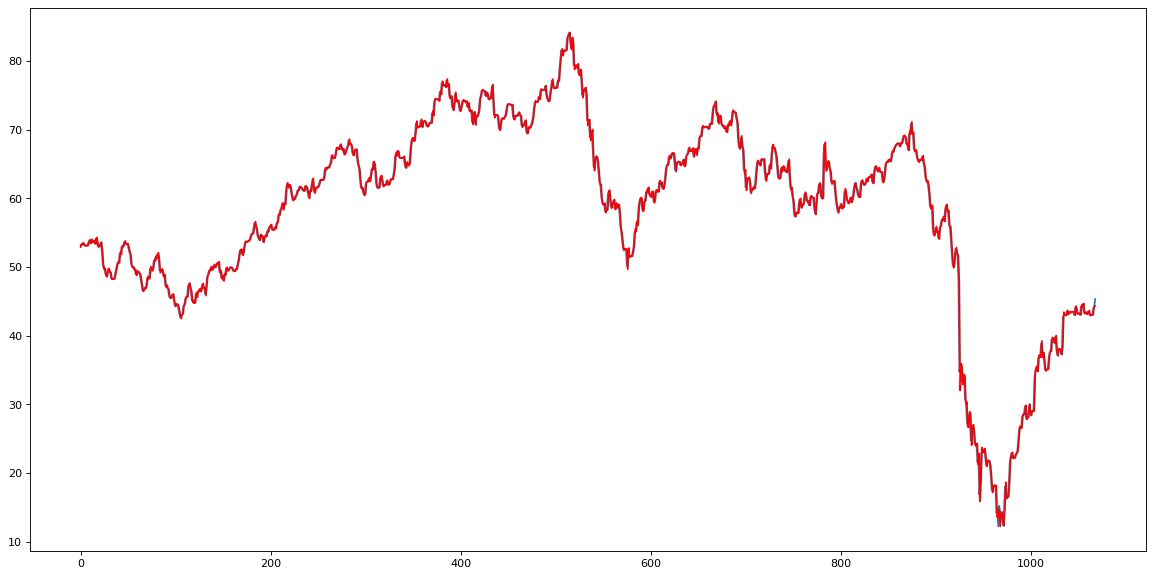

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib.pyplot import figure

# split into train and test sets
X = series["OPEC"].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
figure(num=None, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

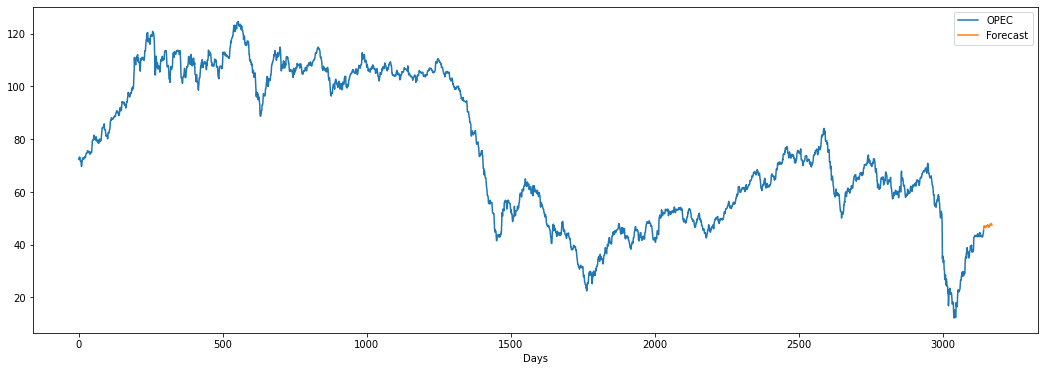

In [ ]:
# Train the model on the full dataset 
model = model = SARIMAX(series['OPEC'], 
						order = (2,0,0), 
						seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 

# Forecast for the next 30 days
forecast = result.predict(start = len(series), 
						end = (len(series)-1) + 30, 
						typ = 'levels').rename('Forecast') 

# Plot the forecast values 
series['OPEC'].plot(figsize = (18, 6), legend = True) 
forecast.plot(legend = True) 
